# Root finding by homotopy method

We find solution of $f(x) = 0$ by homotopy method applied to
$$
h(t,x) = t f(x) + (1-t)(f(x) - f(x_0))
$$
We solve the ODE
$$
x'(t) = -[h_x(t,x)]^{-1} h_t(t,x), \qquad x(0) = x_0
$$
Let $x = (\xi_1, \xi_2) \in R^2$. Consider
$$
f(x) = \begin{bmatrix}
\xi_1^2 - 3 \xi_2^2 + 3 \\
\xi_1 \xi_2 + 6 \end{bmatrix}
$$
Let $x_0 = (1,1)$. Then
$$
h_x = f'(x) = \begin{bmatrix}
2\xi_1 & - 6 \xi_2 \\
\xi_2 & \xi_1 \end{bmatrix}, \qquad h_t = f(x_0) = \begin{bmatrix}
1 \\
7 \end{bmatrix}
$$
$$
h_x^{-1} = \frac{1}{\Delta} \begin{bmatrix}
\xi_1 & 6 \xi_2 \\
-\xi_2 & 2\xi_1 \end{bmatrix}, \qquad \Delta = 2\xi_1^2 + 6 \xi_2^2
$$
The ODE is given by
$$
\frac{d}{dt}\begin{bmatrix}
\xi_1 \\ \xi_2 \end{bmatrix} = -h_x^{-1} h_t =
-\frac{1}{\Delta} \begin{bmatrix}
\xi_1 + 42 \xi_2 \\
-\xi_2 + 14 \xi_1 \end{bmatrix}
$$

In [93]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve, norm
import matplotlib.pyplot as plt

This is the function whose roots are required.

In [94]:
def f(x):
    y = np.zeros(2)
    y[0] = x[0]**2 - 3*x[1]**2 + 3
    y[1] = x[0]*x[1] + 6
    return y

def df(x):
    y = np.array([[2*x[0],-6*x[1]],
                  [x[1],  x[0]]])
    return y

This is the rhs of the ODE obtained from homotopy method.

In [95]:
def F(x,t):
    y = np.zeros(2)
    delta = 2*x[0]**2 + 6*x[1]**2
    y[0] = -(x[0] + 42*x[1])/delta
    y[1] = -(-x[1] + 14*x[0])/delta
    return y

We solve the ode with a relaxed error tolerance.

x = [-2.99046055  2.00603356]
f(x) = [-0.12965756  0.00103578]


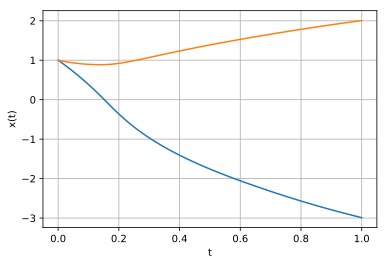

In [96]:
x0 = np.array([1.0,1.0])
t = np.linspace(0,1,100)
x = odeint(F,x0,t,rtol=0.1)

# plot results
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)

# Final solution
xf = np.array([x[-1,0],x[-1,1]])
print('x =',xf)
print('f(x) =',f(xf))

Now we can improve the final solution by applying Newton-Raphson method.

In [97]:
N = 10
eps = 1.0e-13

print('%18.10e %18.10e %18.10e' % (xf[0], xf[1], norm(f(xf))))
for i in range(N):
    J = df(xf)
    dx = solve(J,-f(xf))
    xf = xf + dx
    print('%18.10e %18.10e %18.10e' % (xf[0], xf[1], norm(f(xf))))
    if norm(dx) < eps*norm(xf):
        break

 -2.9904605534e+00   2.0060335560e+00   1.2966169984e-01
 -2.9999822220e+00   1.9999926789e+00   6.0518131105e-05
 -3.0000000000e+00   2.0000000000e+00   2.0260107090e-10
 -3.0000000000e+00   2.0000000000e+00   0.0000000000e+00
 -3.0000000000e+00   2.0000000000e+00   0.0000000000e+00
